## **Checklist de base**

### **Analyse de Forme** : 

- **variable target** : priceString
- **lignes et colonnes** : (4116, 9)
- **types de variables** : qualitatives : 3, quantitatives : 3
- **Analyse des valeurs manquantes** : Il n'y a pas de valeurs manquantes

### **Analyse de Fond** : 

- **Visualisation de la target** : 
  - Le prix varie entre **4500** et **999999**
  
- **Signification des variables** :
  - Les variables continues ne sont ni standardisées, ni asymétrique.
  
- **Relation Variables / Target** :


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('tunisieannonce.csv')

## **Analyse de la forme de donnée**

In [3]:
df.shape

(4116, 9)

In [4]:
df.head()

,name,marque,carburant,date_circulation,kilometrage,nb_ch,boite_vitesse,priceString,url
0,[Réf:3216398] Bmw série 5 phase 2 luxury toit ...,Bmw,Essence,15/01/2015,100 000,9 CV,Automatique,117500,http://www.tunisie-annonce.com/DetailsAnnonceA...
1,[Réf:3165751] Nissan qashqai tekna plus bva,Nissan,Essence,22/11/2017,19 979,6 CV,Automatique,110000,http://www.tunisie-annonce.com/DetailsAnnonceA...
2,[Réf:3203882] Calculateur et boite fusible,Citroen,Diesel,29/10/2010,200 000,5 CV,Mécanique,700000,http://www.tunisie-annonce.com/DetailsAnnonceA...
3,[Réf:3220188] Première main ford focus bonne état,Ford,Essence,15/02/2009,210 000,6 CV,Mécanique,23000,http://www.tunisie-annonce.com/DetailsAnnonceA...
4,[Réf:3215729] 308 full option excellent état e...,Peugeot,Essence,20/06/2014,110 000,5 CV,Mécanique,48500,http://www.tunisie-annonce.com/DetailsAnnonceA...


In [5]:
df.dtypes

name                object
marque              object
carburant           object
date_circulation    object
kilometrage         object
nb_ch               object
boite_vitesse       object
priceString          int64
url                 object
dtype: object

In [6]:
df.dtypes.value_counts()

object    8
int64     1
dtype: int64

In [7]:
df = df.drop('name', axis=1)
df = df.drop('url', axis=1)

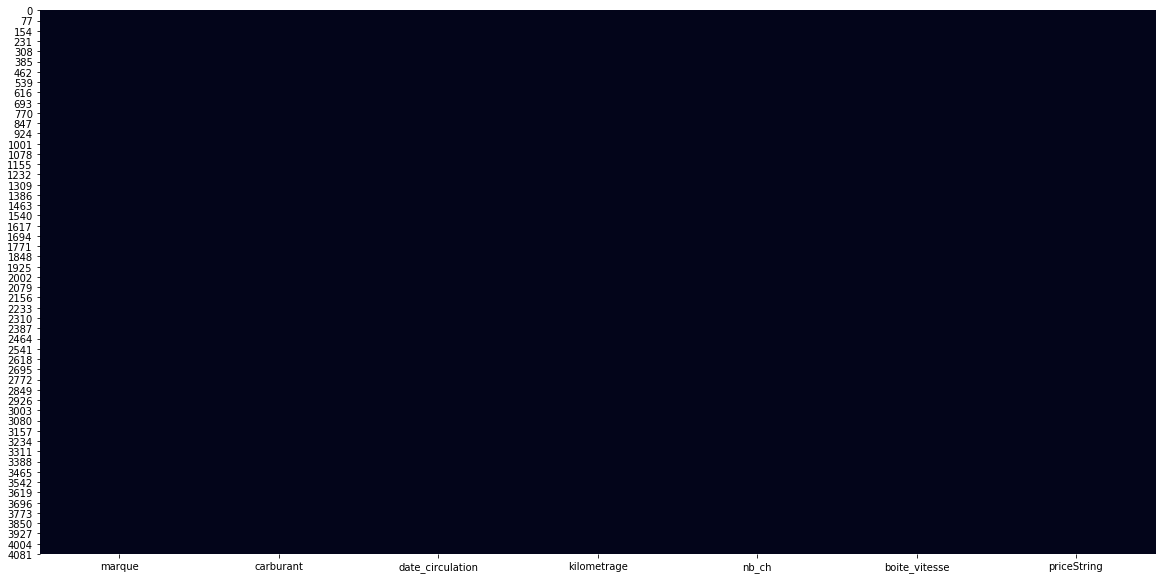

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False )

In [9]:
#df[df['name']=='[Réf:3216941] Une belle golf 6'].count()
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,marque,carburant,date_circulation,kilometrage,nb_ch,boite_vitesse,priceString
52,Fiat,Diesel,20/07/2018,50 000,5 CV,Mécanique,19500
78,Fiat,Diesel,20/07/2018,50 000,5 CV,Mécanique,19500
79,Volkswagen,Diesel,04/05/2010,250 000,5 CV,Mécanique,32000
80,Bmw,Essence,01/01/2010,153 000,7 CV,Mécanique,45000
81,Mercedes,Essence,01/01/2011,180,9 CV,Mécanique,62000
...,...,...,...,...,...,...,...
4111,Peugeot,Essence,30/06/2014,158 000,5 CV,Mécanique,19900
4112,Peugeot,Essence,01/01/2008,130,6 CV,Mécanique,18500
4113,Volkswagen,Essence,21/01/2003,197,4 CV,Mécanique,14000
4114,Volkswagen,Essence,21/01/2003,197,4 CV,Mécanique,140000


- **il n'y a pas de valeur NULL**
- **il y a beaucoup de données dupliqués**

## **Visualisation de la target**

In [10]:
df['priceString'].max()

999999

In [11]:
df['priceString'].min()

4500

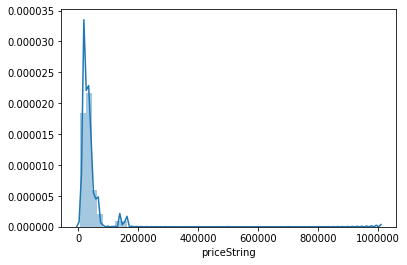

In [12]:
plt.figure()
sns.distplot(df['priceString'].dropna())

# **Les variables continues**

## La variable kilométrage

In [13]:
for i in range(0,df['kilometrage'].count()):
    if (df['kilometrage'][i] == 'n.d'):
        df['kilometrage'][i] = '0'

D:\Users\21620\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
for i in range(0,df['kilometrage'].count()):
    if (len(df['kilometrage'][i]) > 3):
        df['kilometrage'][i]=df['kilometrage'][i][:-3]
    
    df['kilometrage'][i] = int(df['kilometrage'][i])

D:\Users\21620\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Users\21620\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:
df['kilometrage'] = pd.to_numeric(df['kilometrage'])

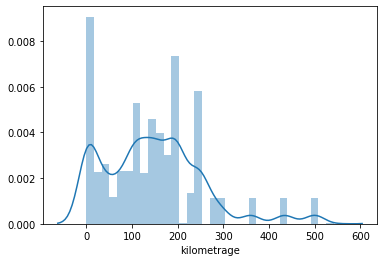

In [16]:
plt.figure()
sns.distplot(df['kilometrage'].dropna())

**En appliquant le remplissage par la médian**

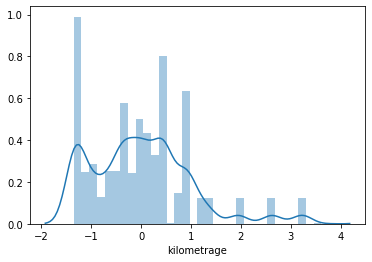

In [57]:
plt.figure()
sns.distplot(df_median['kilometrage'].dropna())

#### Normalisation

In [18]:
df['kilometrage']-=np.mean(df['kilometrage'],axis=0)
df['kilometrage']/=np.std(df['kilometrage'],axis=0)

## La variable date_circulation

In [19]:
import time
import datetime
for i in range(0,df['date_circulation'].count()):
    date = time.mktime(datetime.datetime.strptime(df['date_circulation'][i], "%d/%m/%Y").timetuple())
    today = time.mktime(datetime.date.today().timetuple())
    duree = today - date
    timestamp = datetime.datetime.fromtimestamp(duree)
    nbAnnee = int(timestamp.strftime('%d/%m/%Y')[6:11]) - 1970 
    df['date_circulation'][i] = nbAnnee

D:\Users\21620\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


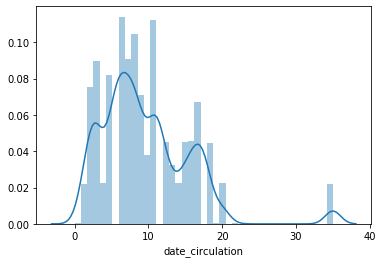

In [20]:
plt.figure()
sns.distplot(df['date_circulation'].dropna())

**En appliquant le remplissage par la médian**

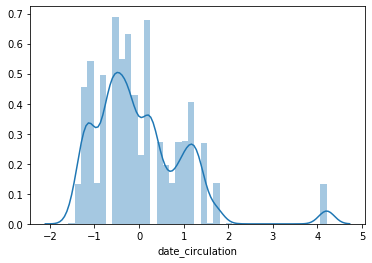

In [58]:
plt.figure()
sns.distplot(df_median['date_circulation'].dropna())

In [21]:
df['date_circulation'] = pd.to_numeric(df['date_circulation'])

#### Normalisation

In [22]:
df['date_circulation']-=np.mean(df['date_circulation'],axis=0)
df['date_circulation']/=np.std(df['date_circulation'],axis=0)

## La variable nb_ch

In [23]:
for i in range(0,df['nb_ch'].count()):
    if (df['nb_ch'][i] == 'n.d'):
        df['nb_ch'][i] = '0'

D:\Users\21620\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
for i in range(0,df['nb_ch'].count()):
        df['nb_ch'][i]=df['nb_ch'][i][0]
        df['nb_ch'][i] = int(df['nb_ch'][i])

D:\Users\21620\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Users\21620\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


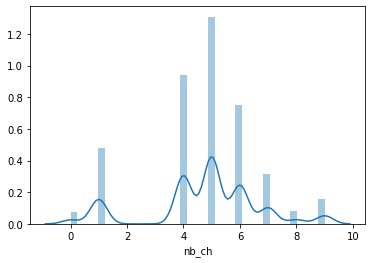

In [25]:
plt.figure()
sns.distplot(df['nb_ch'].dropna())

**En appliquant le remplissage par la médian**

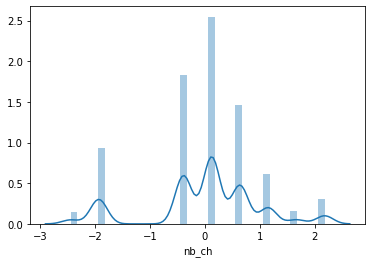

In [59]:
plt.figure()
sns.distplot(df_median['nb_ch'].dropna())

In [26]:
df['nb_ch'] = pd.to_numeric(df['nb_ch'])

#### Normalisation

In [26]:
df['nb_ch']-=np.mean(df['nb_ch'],axis=0)
df['nb_ch']/=np.std(df['nb_ch'],axis=0)

In [27]:
df

,marque,carburant,date_circulation,kilometrage,nb_ch,boite_vitesse,priceString
0,Bmw,Essence,-0.757958,-0.435902,2.17819,Automatique,117500
1,Nissan,Essence,-1.254470,-1.177929,0.63721,Automatique,110000
2,Citroen,Diesel,-0.095941,0.480180,0.123548,Mécanique,700000
3,Ford,Essence,0.235067,0.571788,0.63721,Mécanique,23000
4,Peugeot,Essence,-0.592453,-0.344294,0.123548,Mécanique,48500
...,...,...,...,...,...,...,...
4111,Peugeot,Essence,-0.592453,0.095425,0.123548,Mécanique,19900
4112,Peugeot,Essence,0.400572,-0.161078,0.63721,Mécanique,18500
4113,Volkswagen,Essence,1.228092,0.452697,-0.390113,Mécanique,14000
4114,Volkswagen,Essence,1.228092,0.452697,-0.390113,Mécanique,140000


# **Les variables discrétes**

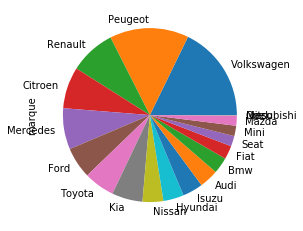

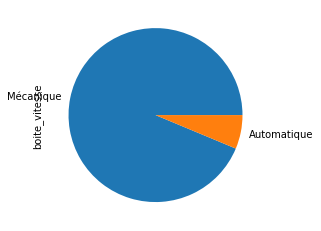

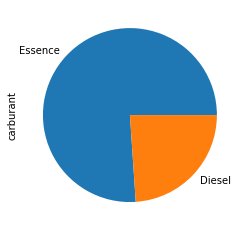

In [29]:
plt.figure()
df['marque'].value_counts().plot.pie()
plt.figure()
df['boite_vitesse'].value_counts().plot.pie()
plt.figure()
df['carburant'].value_counts().plot.pie()

# **Feauture engineering**

### **Remplissage par median**

In [30]:
df_median = df.copy()

In [31]:
df_median = df_median.drop('marque', axis=1)
df_median = df_median.drop('carburant', axis=1)
df_median = df_median.drop('boite_vitesse', axis=1)

In [32]:
columns=['date_circulation', 'kilometrage', 'nb_ch', 'priceString']

In [33]:
imputer = Imputer(missing_values = 0, strategy = 'median', axis = 0)
b= imputer.fit(df_median)
b= imputer.transform(df_median) #remplissage par la median

D:\Users\21620\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [34]:
df_median=pd.DataFrame(b,columns=columns)

# **Feature engineering**

### Encodage de la variable marque

In [35]:
from sklearn.preprocessing import OneHotEncoder
marque=df["marque"]
encoder = OneHotEncoder()
tr_marque=encoder.fit_transform(marque.values.reshape(-1,1))
tr_marque.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [36]:
encoder.categories_

[array(['Audi', 'Bmw', 'Citroen', 'Fiat', 'Ford', 'Hyundai', 'Isuzu',
        'Iveco', 'Kia', 'Mazda', 'Mercedes', 'Mini', 'Mitsubishi',
        'Nissan', 'Opel', 'Peugeot', 'Renault', 'Seat', 'Toyota',
        'Volkswagen'], dtype=object)]

In [37]:
marque_df=pd.concat([pd.DataFrame(tr_marque.toarray()
,marque.index,columns=['Audi', 'Bmw', 'Citroen', 'Fiat', 'Ford', 'Hyundai', 'Isuzu',
        'Iveco', 'Kia', 'Mazda', 'Mercedes', 'Mini', 'Mitsubishi',
        'Nissan', 'Opel', 'Peugeot', 'Renault', 'Seat', 'Toyota',
        'Volkswagen']),marque],axis=1)

### Encodage de la variable carburant

In [38]:
carburant=df["carburant"]
tr_carburant=encoder.fit_transform(carburant.values.reshape(-1,1))
tr_carburant.toarray()

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [39]:
encoder.categories_

[array(['Diesel', 'Essence'], dtype=object)]

In [40]:
carburant_df=pd.concat([pd.DataFrame(tr_carburant.toarray()
,carburant.index,columns=['Diesel', 'Essence']),carburant],axis=1)

### Encodage de la variable boite_vitesse

In [41]:
vitesse=df["boite_vitesse"]
tr_vitesse=encoder.fit_transform(vitesse.values.reshape(-1,1))
tr_vitesse.toarray()

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [42]:
encoder.categories_

[array(['Automatique', 'Mécanique'], dtype=object)]

In [43]:
vitesse_df=pd.concat([pd.DataFrame(tr_vitesse.toarray()
,vitesse.index,columns=['Automatique', 'Mécanique']),vitesse],axis=1)

## Concaténation des données

In [44]:
DataFrame=pd.concat([df_median,marque_df.drop(columns=["marque"]),carburant_df.drop(columns=["carburant"]),vitesse_df.drop(columns=["boite_vitesse"])],axis=1)

In [45]:
DataFrame

,date_circulation,kilometrage,nb_ch,priceString,Audi,Bmw,Citroen,Fiat,Ford,Hyundai,...,Opel,Peugeot,Renault,Seat,Toyota,Volkswagen,Diesel,Essence,Automatique,Mécanique
0,-0.757958,-0.435902,2.178194,117500.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-1.254470,-1.177929,0.637210,110000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.095941,0.480180,0.123548,700000.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.235067,0.571788,0.637210,23000.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-0.592453,-0.344294,0.123548,48500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,-0.592453,0.095425,0.123548,19900.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4112,0.400572,-0.161078,0.637210,18500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4113,1.228092,0.452697,-0.390113,14000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4114,1.228092,0.452697,-0.390113,140000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


### **Relation Variables / Variables**

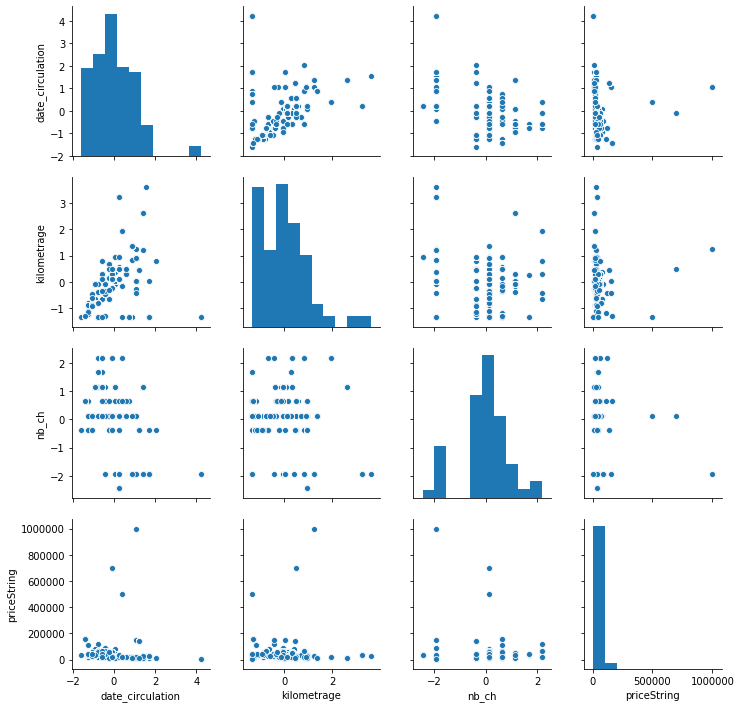

In [46]:
sns.pairplot(df_median)

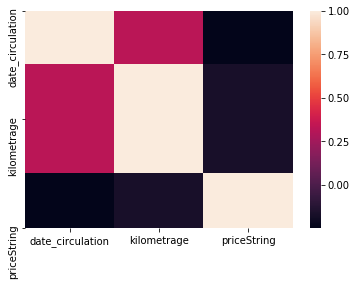

In [47]:
sns.heatmap(df.corr()) 

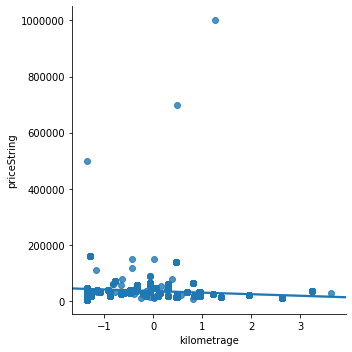

In [48]:
sns.lmplot(x='kilometrage',y='priceString',data=df)

In [49]:
df.dtypes

marque               object
carburant            object
date_circulation    float64
kilometrage         float64
nb_ch                object
boite_vitesse        object
priceString           int64
dtype: object

In [50]:
df["date_circulation"].astype("int64")

0       0
1      -1
2       0
3       0
4       0
       ..
4111    0
4112    0
4113    1
4114    1
4115   -1
Name: date_circulation, Length: 4116, dtype: int64

In [51]:
df["kilometrage"]=df["kilometrage"].astype("int")

In [52]:
df.dtypes

marque               object
carburant            object
date_circulation    float64
kilometrage           int32
nb_ch                object
boite_vitesse        object
priceString           int64
dtype: object

In [53]:
df.corr()

,date_circulation,kilometrage,priceString
date_circulation,1.000000,0.179849,-0.249877
kilometrage,0.179849,1.000000,-0.128722
priceString,-0.249877,-0.128722,1.000000


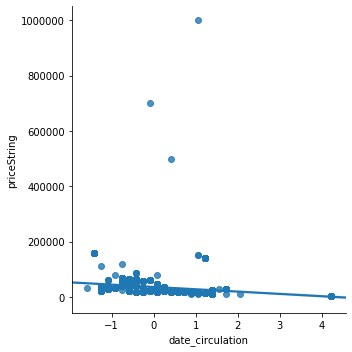

In [54]:
sns.lmplot(x='date_circulation',y='priceString',data=df_median)

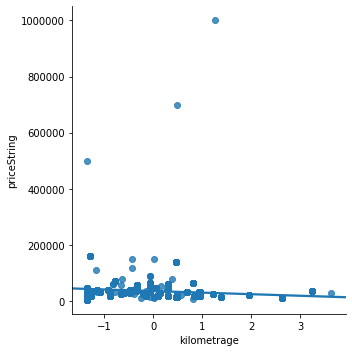

In [55]:
sns.lmplot(x='kilometrage',y='priceString',data=df_median)

In [56]:
DataFrame

,date_circulation,kilometrage,nb_ch,priceString,Audi,Bmw,Citroen,Fiat,Ford,Hyundai,...,Opel,Peugeot,Renault,Seat,Toyota,Volkswagen,Diesel,Essence,Automatique,Mécanique
0,-0.757958,-0.435902,2.178194,117500.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-1.254470,-1.177929,0.637210,110000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.095941,0.480180,0.123548,700000.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.235067,0.571788,0.637210,23000.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-0.592453,-0.344294,0.123548,48500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,-0.592453,0.095425,0.123548,19900.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4112,0.400572,-0.161078,0.637210,18500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4113,1.228092,0.452697,-0.390113,14000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4114,1.228092,0.452697,-0.390113,140000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## **Reduction De dimension**

### Analayse de composante principale ACP

In [150]:
from sklearn.decomposition import PCA

In [152]:
pca = PCA(n_components=0.99)
pca1 = PCA()
X_pca1 = pca.fit_transform(X)

In [161]:
df_reduced= pd.DataFrame(X_pca1,columns=['PC1','PC2' ,'PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'
                          ,'PC13','PC14','PC15','PC16','PC17','PC18' ]) 
X_pca1.shape

(4116, 18)

In [162]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(6,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

In [163]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

In [164]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

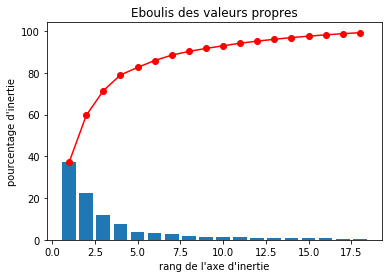

In [165]:
display_scree_plot(pca)

- Les quatre premiers composantes contribuent énormément , la premiére composante contribue de 37%, la deuxiéme composante contribue de 22%, la troisiéme contribue de 12% et la quatriéme de 7%.

In [166]:
pca.explained_variance_ratio_

array([0.37165329, 0.22391525, 0.11891949, 0.07502557, 0.03609822,
       0.03309953, 0.025853  , 0.01796066, 0.01405065, 0.01292909,
       0.0122026 , 0.01005151, 0.00882549, 0.00817938, 0.00672914,
       0.00630734, 0.00570159, 0.00457286])

In [171]:
composantes = pca.components_

In [174]:
nbre_composantes = X_pca1.shape[1]
columns=X.columns

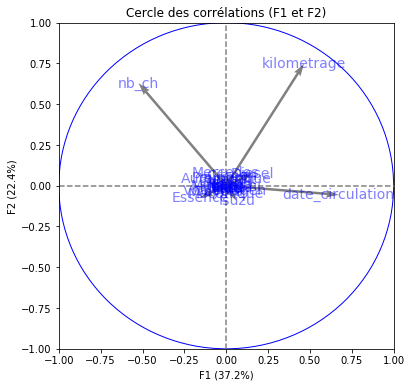

In [176]:
display_circles(composantes, nbre_composantes, pca,axis_ranks= [(0,1)], labels= np.array(columns))

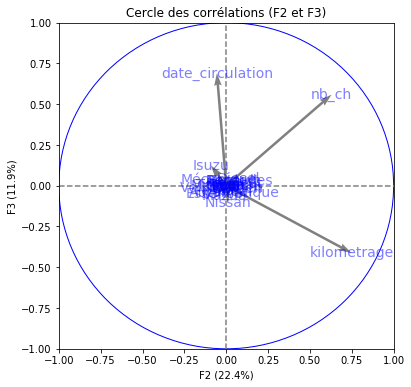

In [177]:
display_circles(composantes, nbre_composantes, pca,axis_ranks= [(1,2)], labels= np.array(columns))

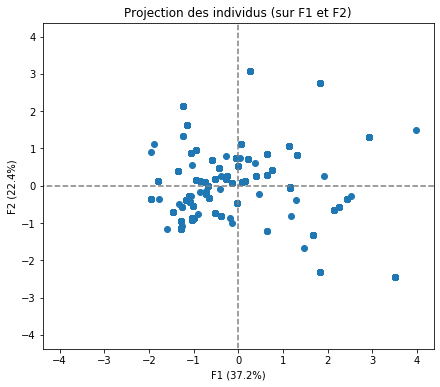

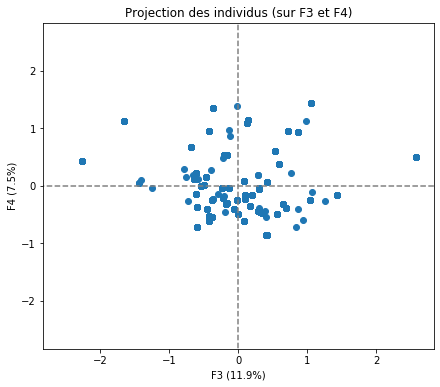

In [179]:
X_projected = pca.transform(X)
display_factorial_planes(X_projected, nbre_composantes, pca, [(0,1),(2,3)])

## **Train Test**

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
y = DataFrame['priceString']
X = DataFrame.drop('priceString', axis=1) #axis=1 c'est pour indiquer les colonnes

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Modelisation

### 1) Linear regression

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
model.predict(X_test)
model.score(X_test, y_test)

0.21318734382810944

### Cross Validation

In [121]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [96]:
cross_val_score(LinearRegression(), X_train, y_train, cv=5).mean()

0.3299394994042527

In [119]:
df.iloc[0]

marque                      Bmw
carburant               Essence
date_circulation      -0.753111
kilometrage                   0
nb_ch                   2.17819
boite_vitesse       Automatique
priceString              117500
Name: 0, dtype: object

In [124]:
y_pred = cross_val_predict(LinearRegression(), X_train, y_train, cv=5)

In [135]:
y_pred[1001]

3530.8344118630484

In [134]:
y_train[1001]

46000.0

### 2) Ridge regression

In [64]:
from sklearn.linear_model import Ridge

In [70]:
modelRidge = Ridge(alpha=1.0)
modelRidge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [71]:
modelRidge.predict(X_test)
modelRidge.score(X_test, y_test)

0.21327439652324928

### Cross Validation

In [99]:
cross_val_score(Ridge(alpha=1.0), X_train, y_train, cv=5).mean()

0.3305919771131435

### 3) Lasso

In [73]:
from sklearn import linear_model

In [74]:
modelLasso = linear_model.Lasso(alpha=0.1)
modelLasso.fit(X_train, y_train)

D:\Users\21620\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185252888944.8462, tolerance: 360862891.7811265
  positive)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [77]:
modelLasso.predict(X_test)
modelLasso.score(X_test, y_test)

0.21272788823034317

### Cross Validation

#### Méthode 1

In [142]:
from sklearn.linear_model import LassoCV
lassoCV = linear_model.LassoCV()
lassoCV.fit(X, y)
lassoCV.predict(X_test)
lassoCV.score(X_test, y_test)

D:\Users\21620\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.21596126318404263

#### Méthode 2

In [102]:
cross_val_score(linear_model.Lasso(alpha=0.1), X_train, y_train, cv=5).mean()

D:\Users\21620\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167563803930.38086, tolerance: 318640261.8613924
  positive)
D:\Users\21620\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182077415657.9453, tolerance: 276646138.302918
  positive)
D:\Users\21620\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164605637658.83618, tolerance: 323344546.8936508
  positive)
D:\Users\21620\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

0.3314432326195985

### 4) ElasticNet

In [79]:
from sklearn.linear_model import ElasticNet

In [80]:
modelElastic = ElasticNet(random_state=0)
modelElastic.fit(X, y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [81]:
modelElastic.predict(X_test)
modelElastic.score(X_test, y_test)

0.11369432562823112

### Cross Validation

In [106]:
cross_val_score(ElasticNet(random_state=0), X_train, y_train, cv=5).mean()

0.17978152317463952